## Ejercicio 1
##### A)  Interpole los puntos:
p1 = (5.4, 3.2)
p2_i = (9.5, 0.7)
p3 = (12.3, -3.6)
De estos, el punto p2i
  debe ser seleccionable y movible. Cree un programa que interpole una parábola en tiempo real para los tres puntos.

FloatSlider(value=0.7, continuous_update=False, description='p2_i y:', max=4.2, min=-4.6)

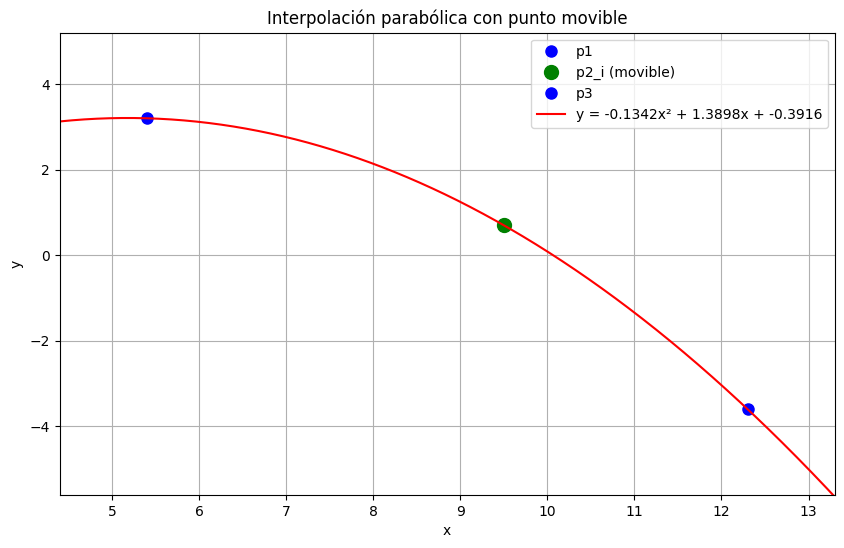

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Puntos iniciales
p1 = (5.4, 3.2)
p2_i = [9.5, 0.7]
p3 = (12.3, -3.6)

# Función para calcular los coeficientes de la parábola
def calcular_coeficientes(puntos):
    x = [p[0] for p in puntos]
    y = [p[1] for p in puntos]

    # Sistema de ecuaciones para y = ax² + bx + c
    A = np.array([[x[0]**2, x[0], 1],
                  [x[1]**2, x[1], 1],
                  [x[2]**2, x[2], 1]])
    b = np.array([y[0], y[1], y[2]])

    # Resolver el sistema
    coeficientes = np.linalg.solve(A, b)
    return coeficientes

# Límites para los ejes
x_min = min(p1[0], p2_i[0], p3[0]) - 1
x_max = max(p1[0], p2_i[0], p3[0]) + 1
y_min = min(p1[1], p2_i[1], p3[1]) - 2
y_max = max(p1[1], p2_i[1], p3[1]) + 2

# Función para actualizar el gráfico
def actualizar(x, y):
    p2_i[0] = x
    p2_i[1] = y

    clear_output(wait=True)

    # Mostrar los widgets nuevamente
    display(slider_x, slider_y)

    fig, ax = plt.subplots(figsize=(10, 6))

    # Graficar los puntos
    ax.plot(p1[0], p1[1], 'bo', markersize=8, label='p1')
    ax.plot(p2_i[0], p2_i[1], 'go', markersize=10, label='p2_i (movible)')
    ax.plot(p3[0], p3[1], 'bo', markersize=8, label='p3')

    # Calcular y graficar la parábola
    coef = calcular_coeficientes([p1, p2_i, p3])
    x_parabola = np.linspace(x_min, x_max, 1000)
    y_parabola = coef[0] * x_parabola**2 + coef[1] * x_parabola + coef[2]
    ax.plot(x_parabola, y_parabola, 'r-', label=f'y = {coef[0]:.4f}x² + {coef[1]:.4f}x + {coef[2]:.4f}')

    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Interpolación parabólica con punto movible')
    ax.grid(True)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    plt.show()

# Crear sliders para controlar la posición
slider_x = widgets.FloatSlider(
    value=p2_i[0],
    min=x_min+1,
    max=x_max-1,
    step=0.1,
    description='p2_i x:',
    continuous_update=False
)

slider_y = widgets.FloatSlider(
    value=p2_i[1],
    min=y_min+1,
    max=y_max-1,
    step=0.1,
    description='p2_i y:',
    continuous_update=False
)

# Función para manejar los cambios en los sliders
def on_value_change(change):
    actualizar(slider_x.value, slider_y.value)

# Conectar eventos
slider_x.observe(on_value_change, names='value')
slider_y.observe(on_value_change, names='value')

# Mostrar widgets y gráfico inicial
display(slider_x, slider_y)
actualizar(p2_i[0], p2_i[1])